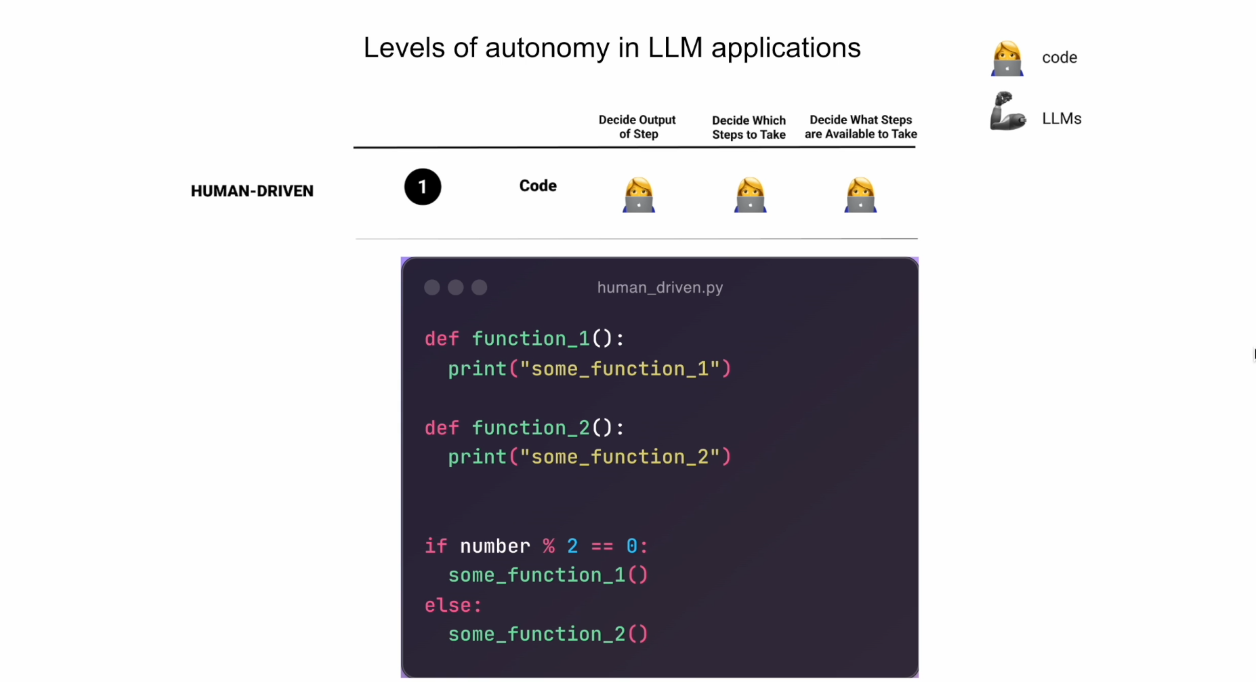


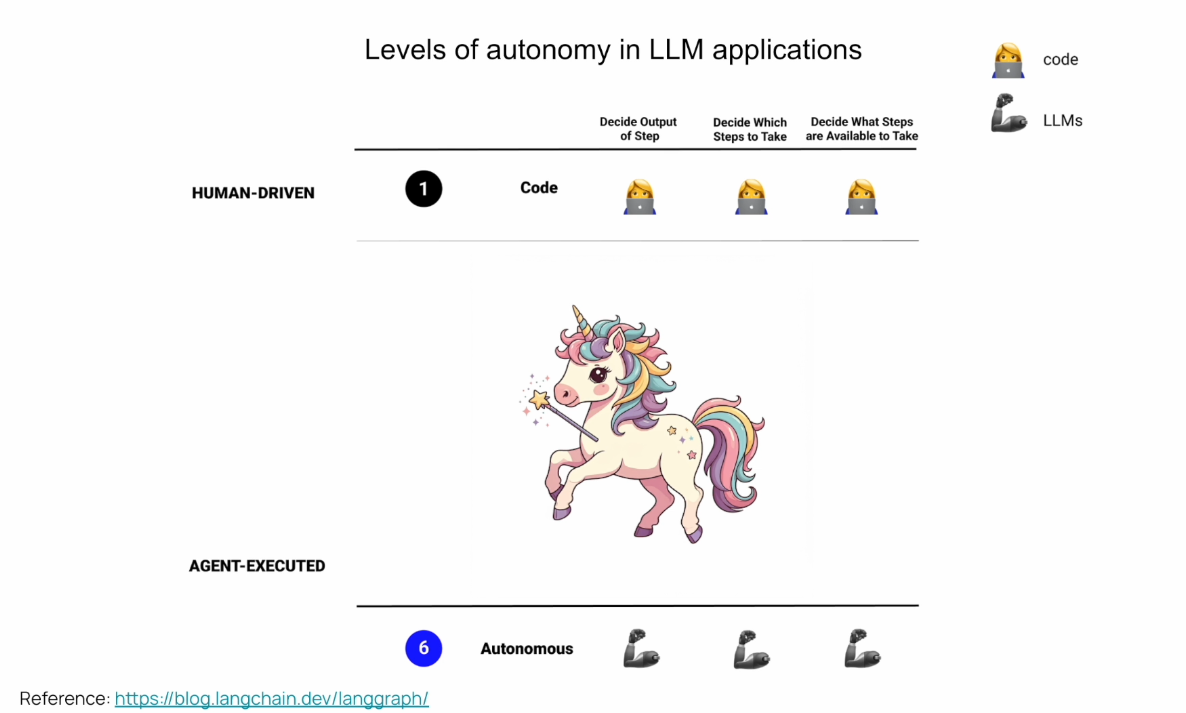

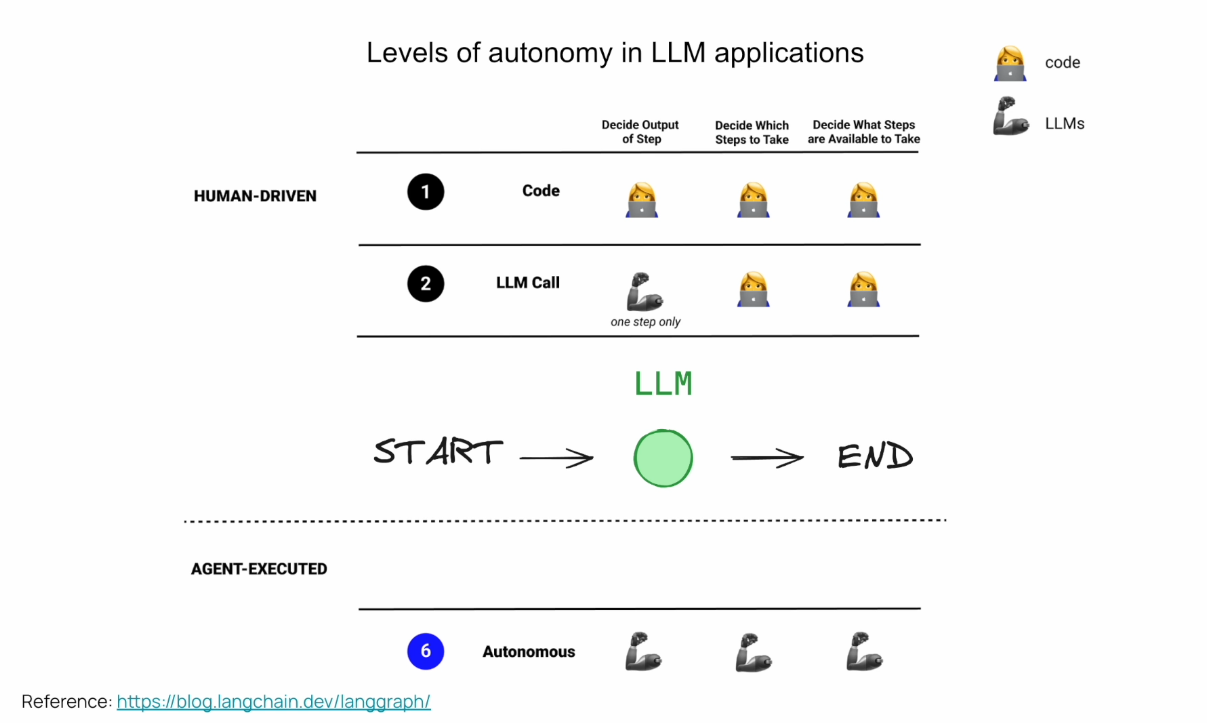

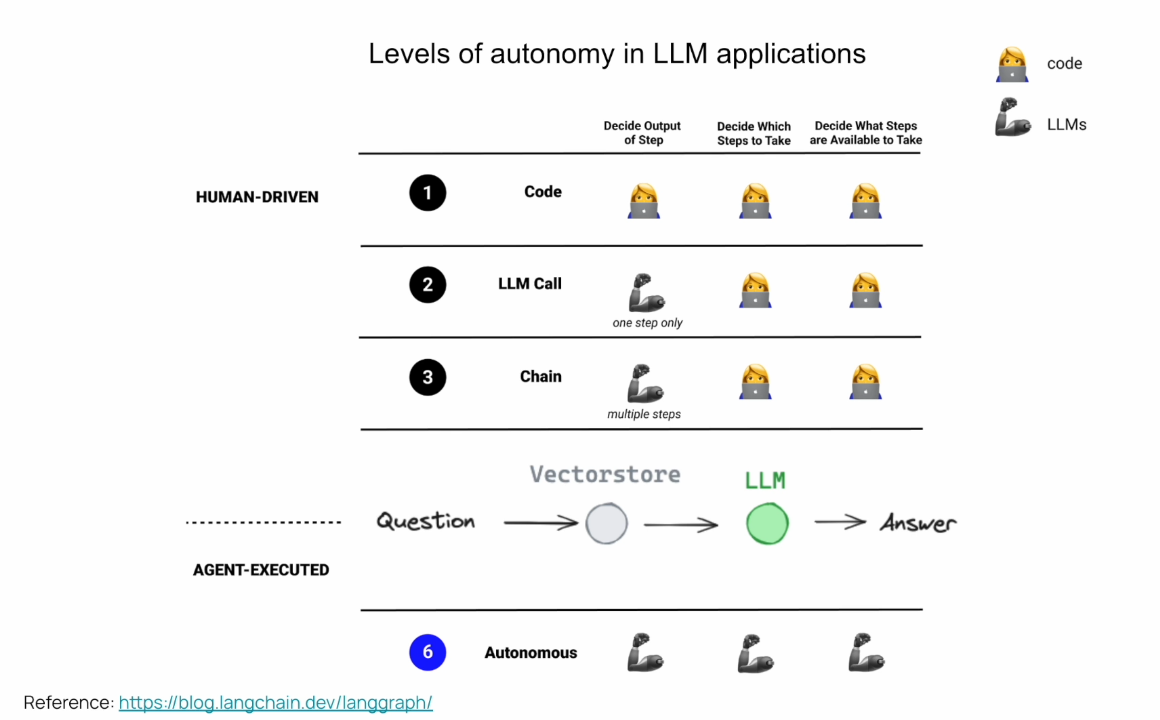

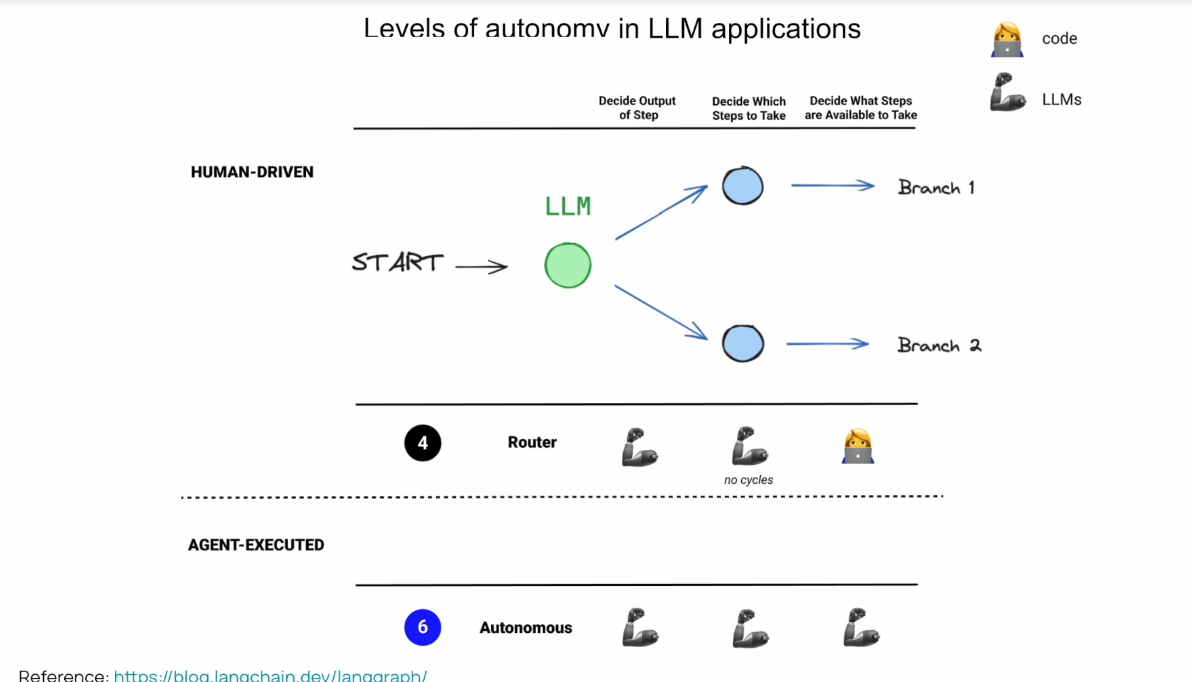

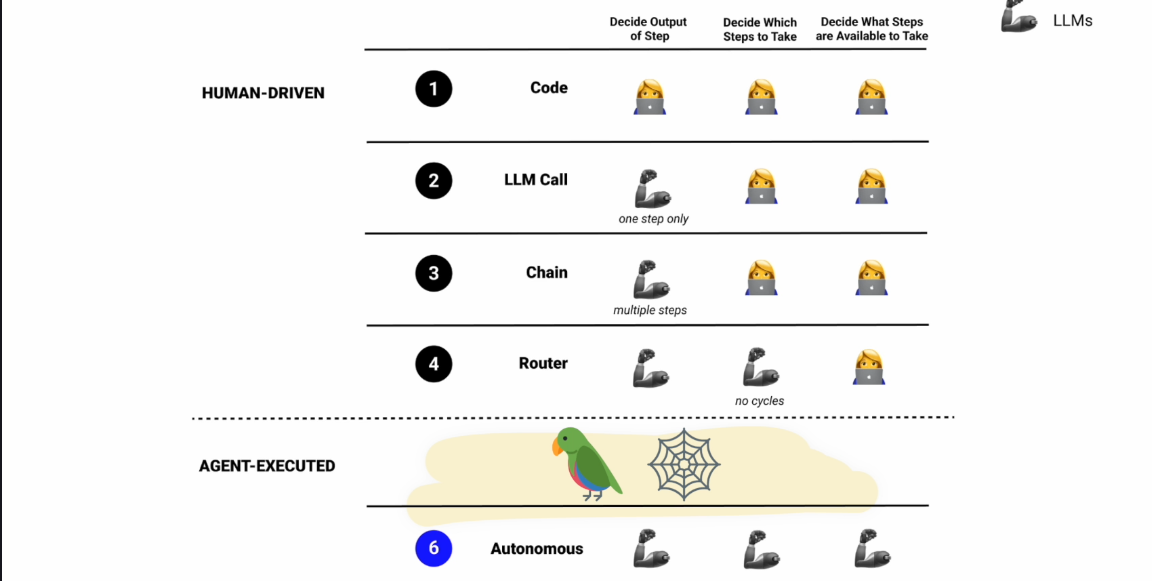

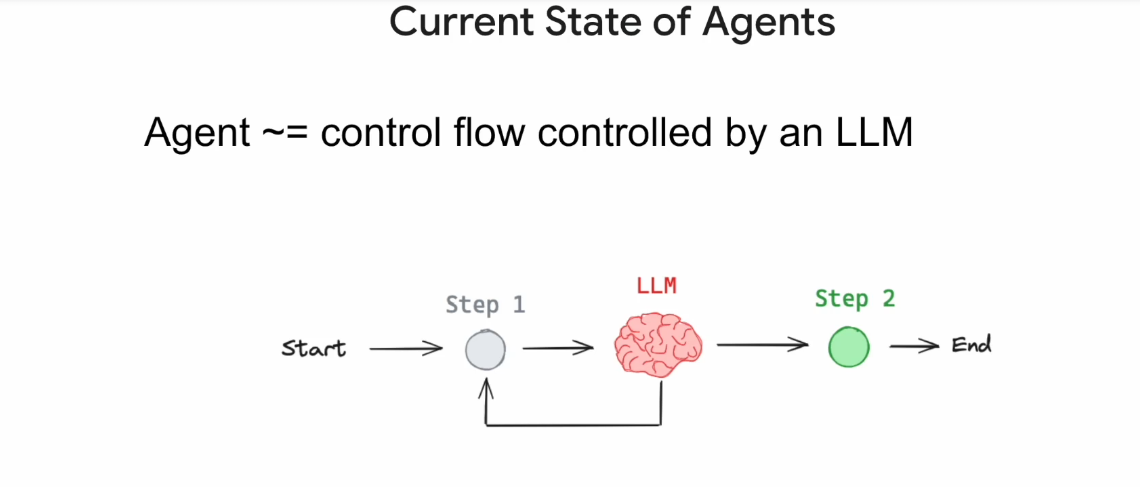

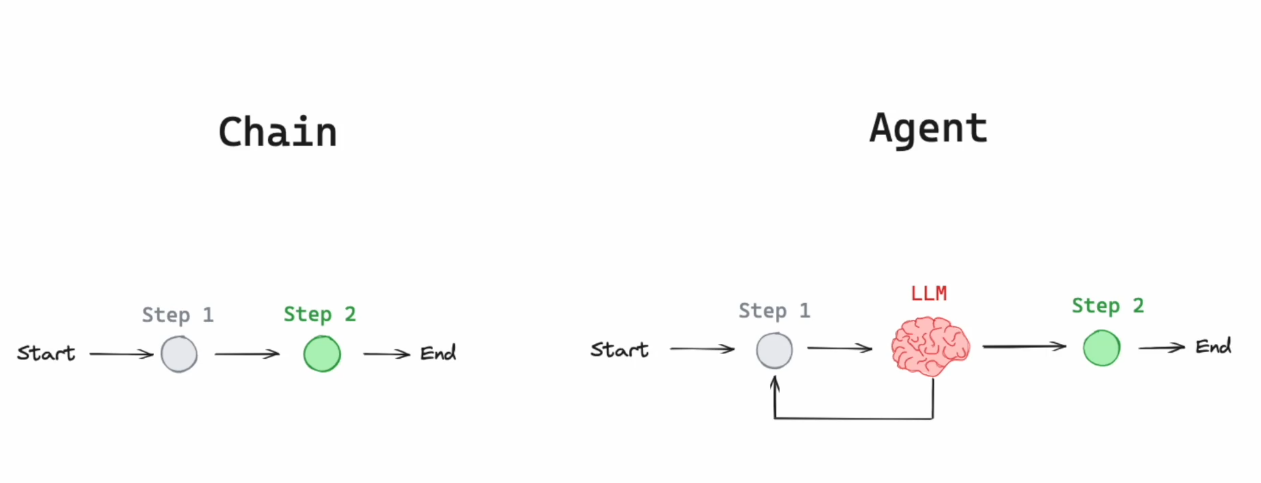

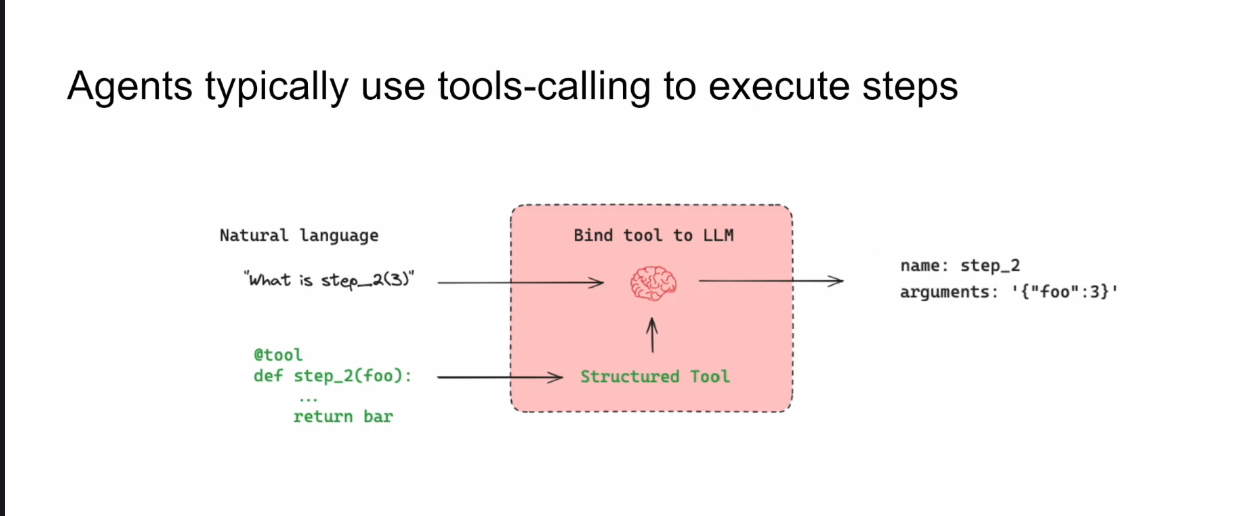

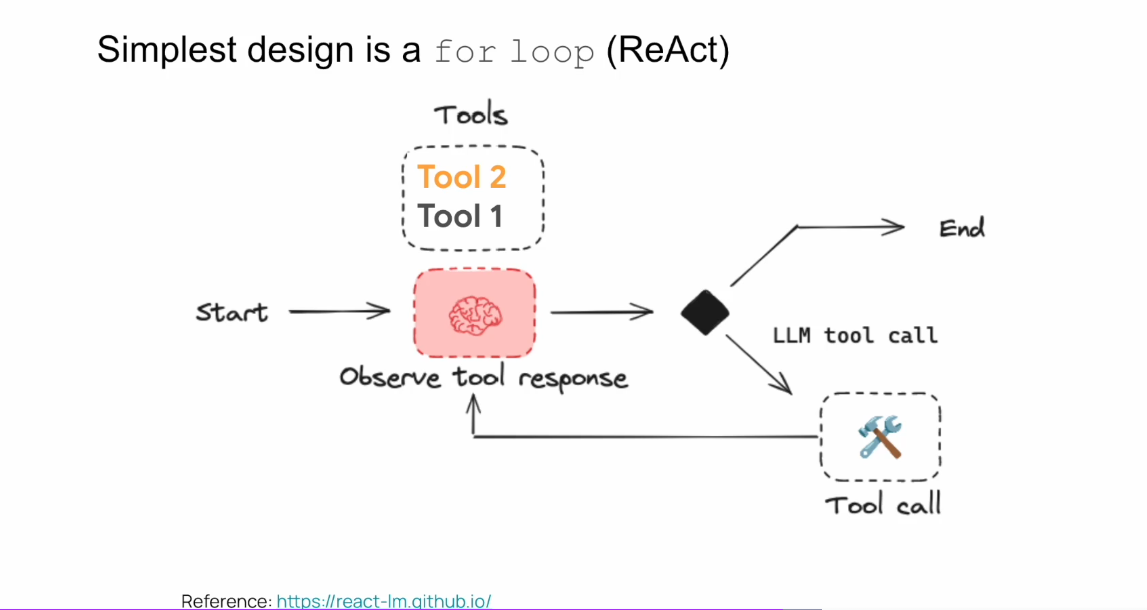

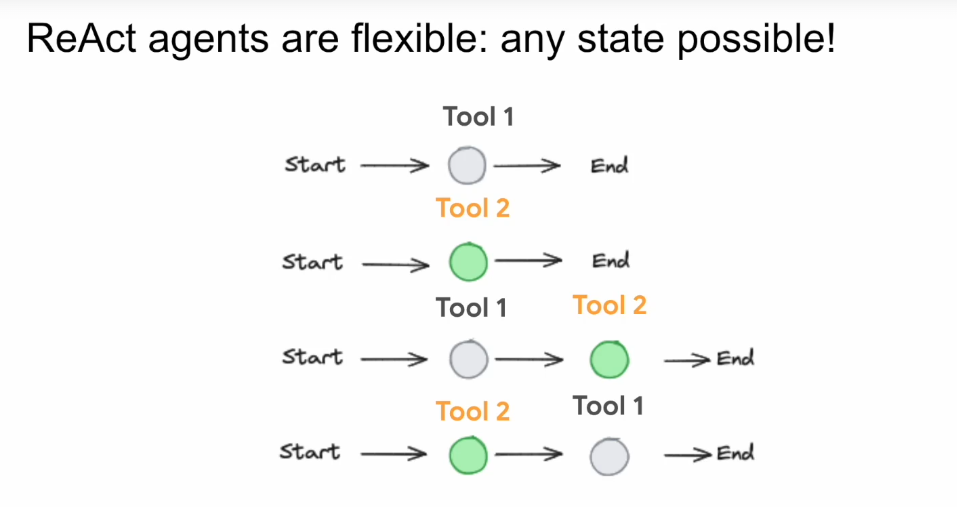

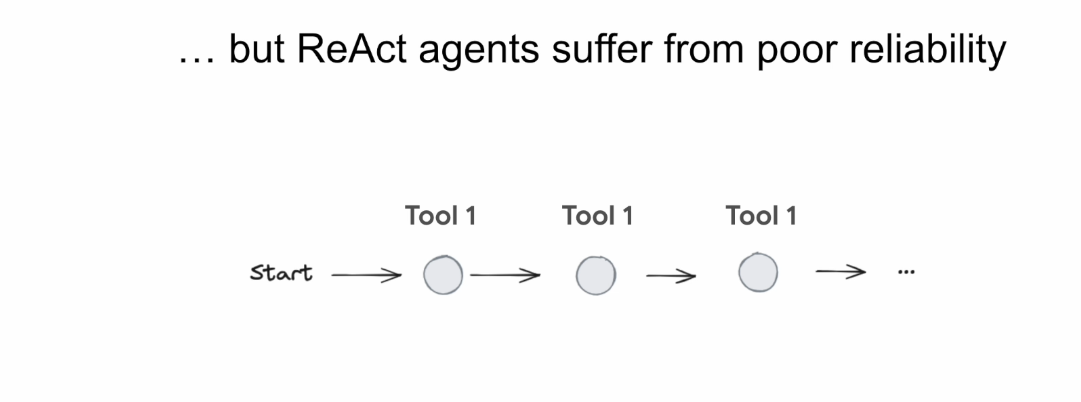

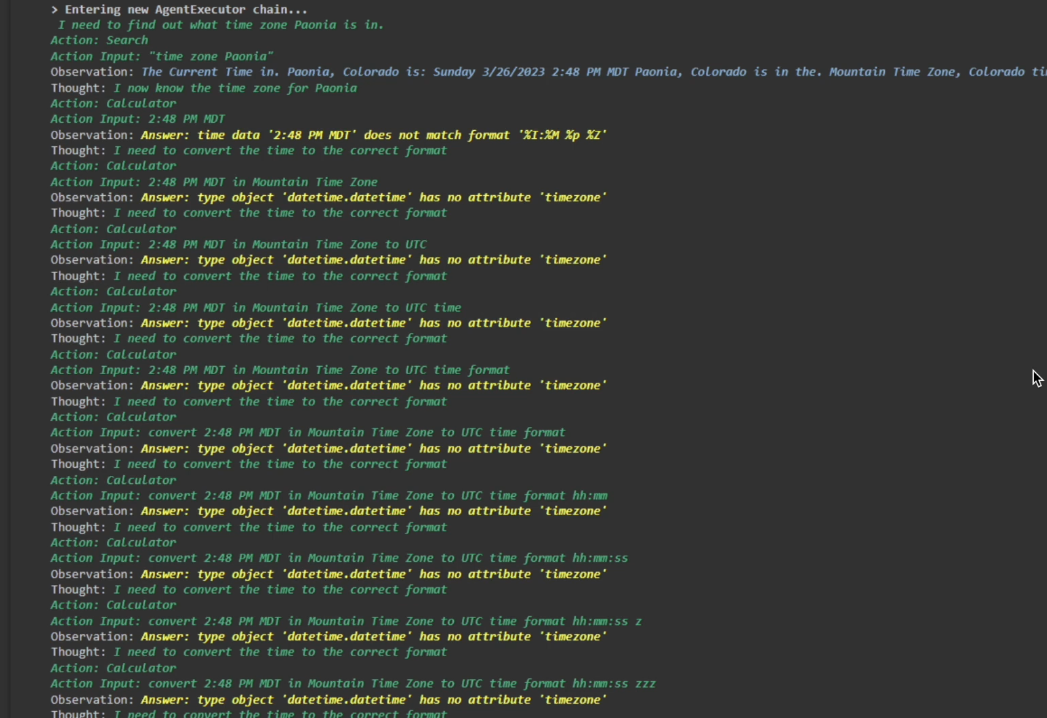

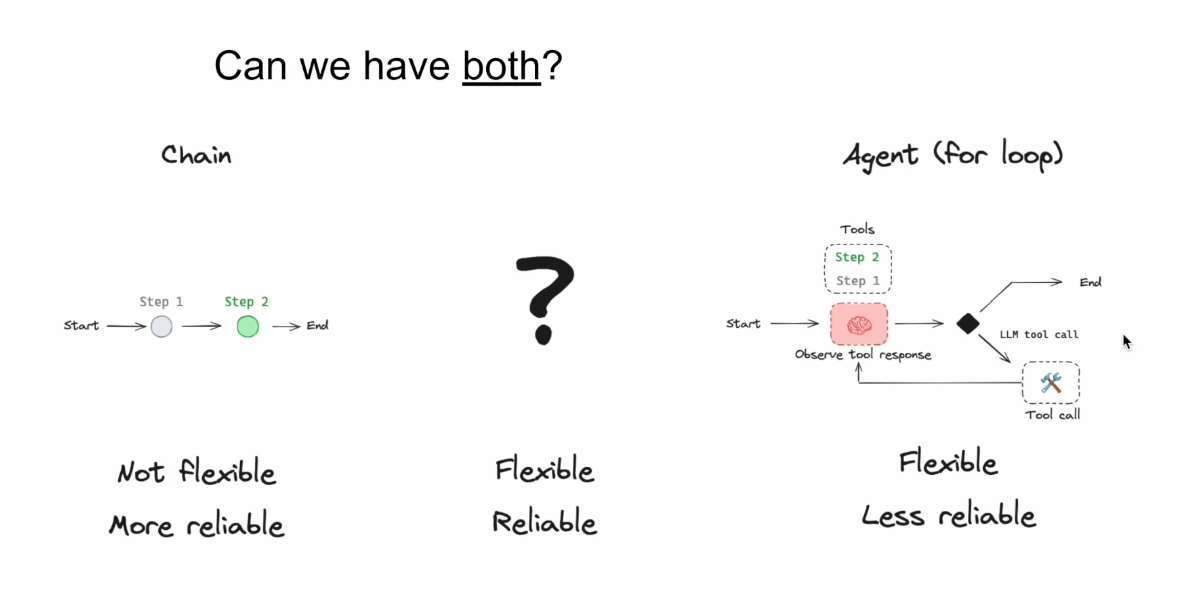

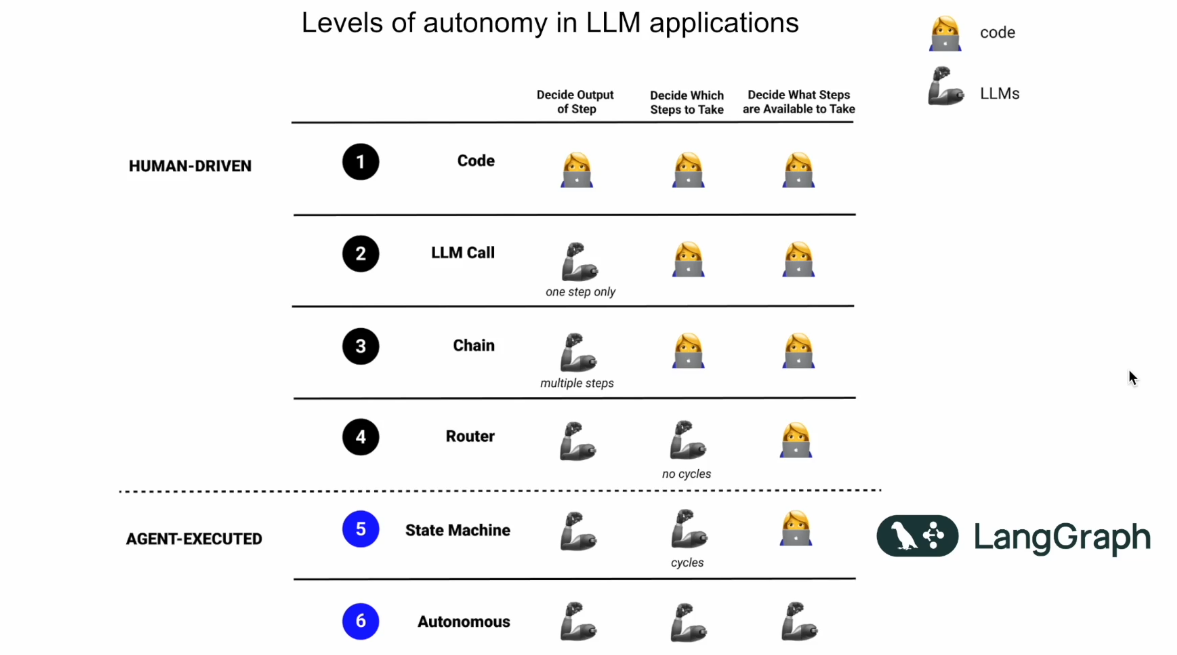

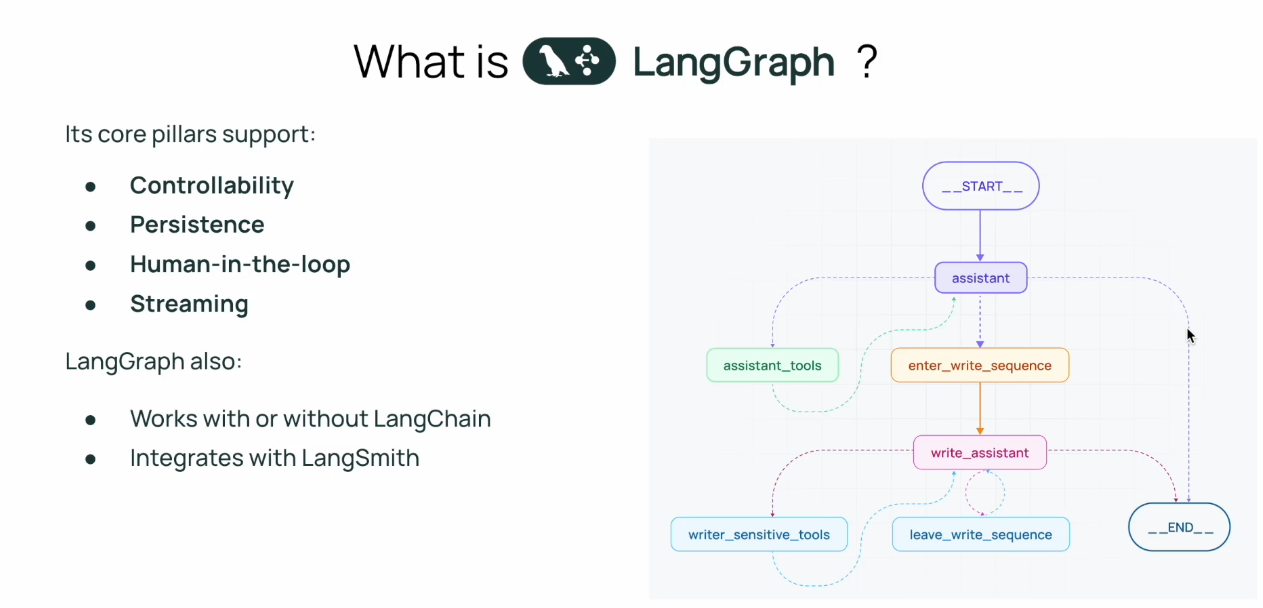

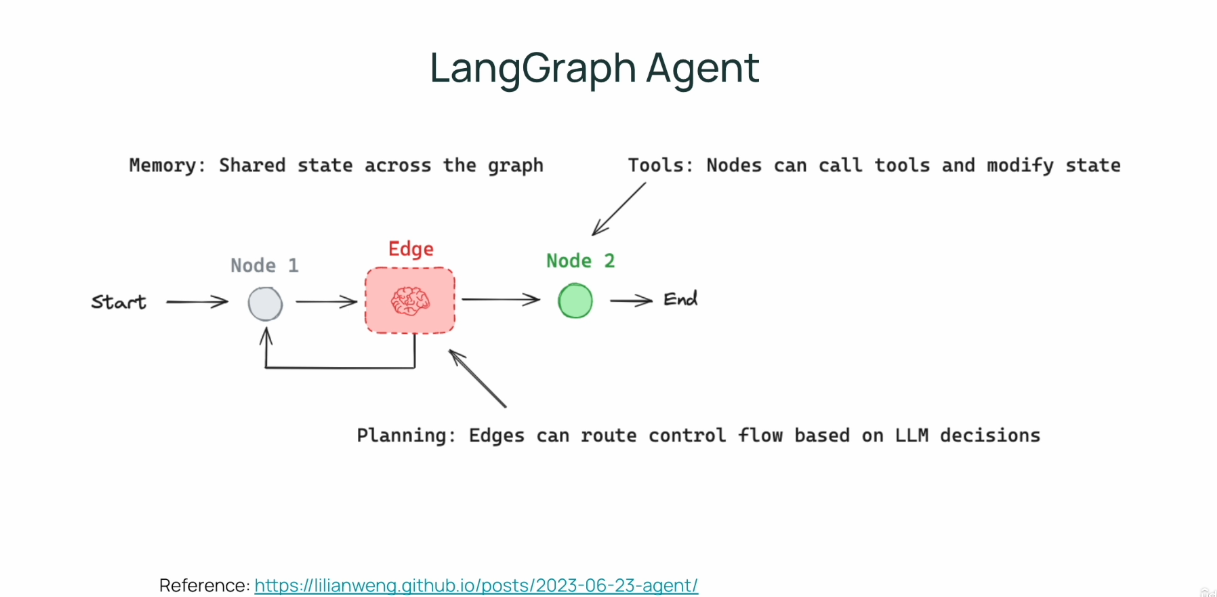

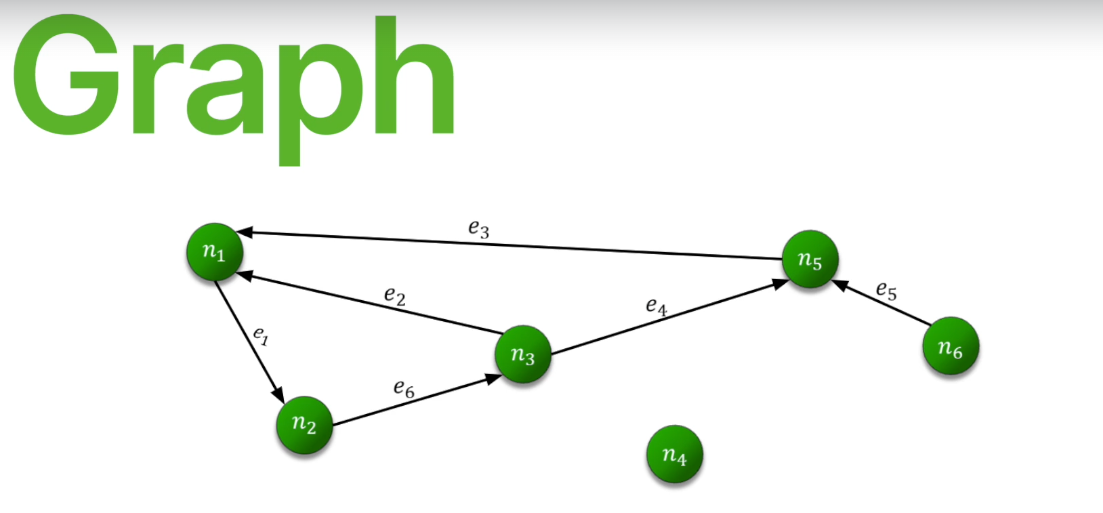

And a state machine on the other hand

is a model of computation where it consists of states

and transition between those states.

And by defining different states

and the rules for the transition between them,

then the states can manage complex conditions

and sequence in software systems.

And now you can notice that state machines

can be represented as graphs

where the states are nodes and the transitions are edges.

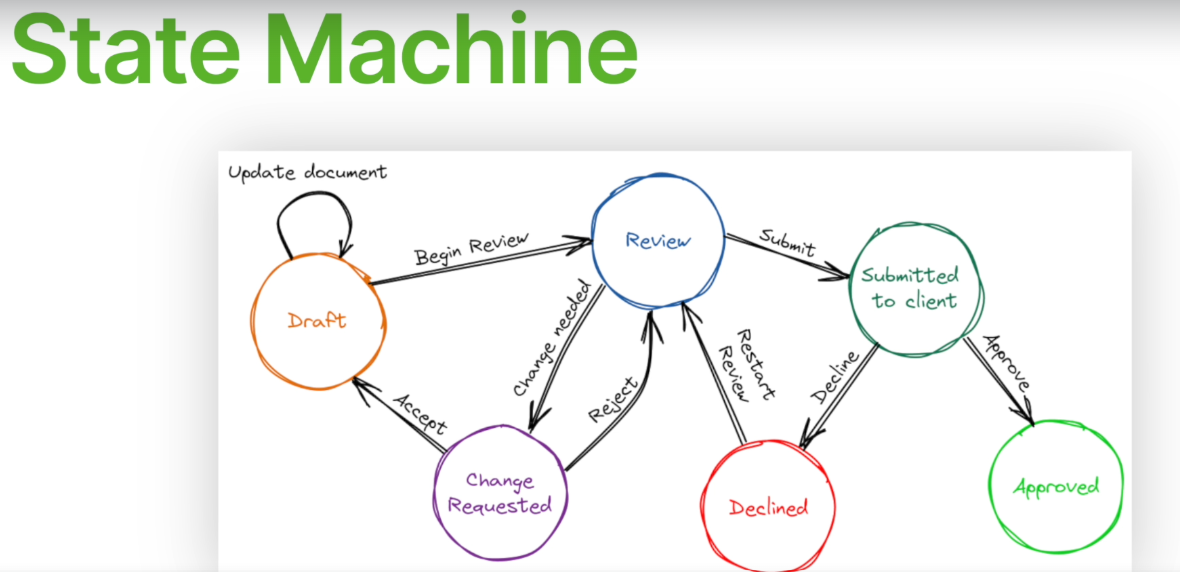

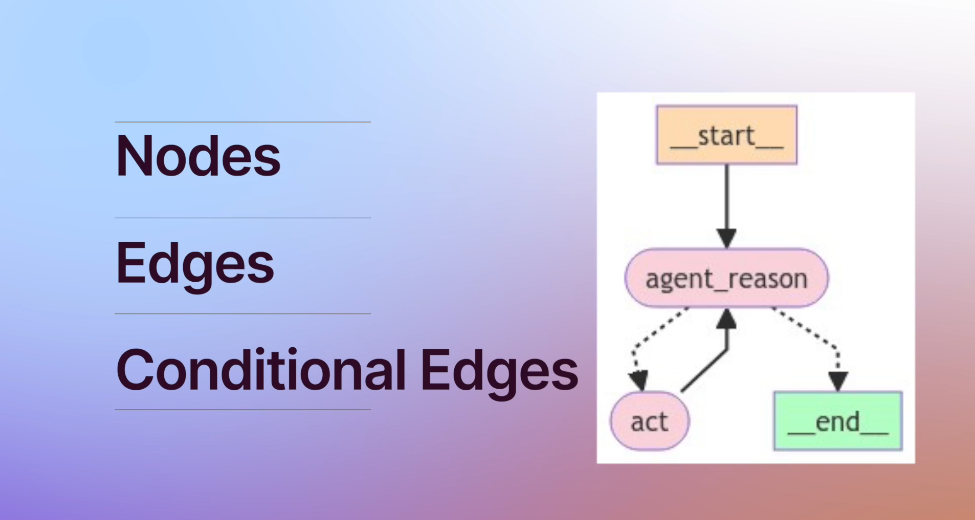

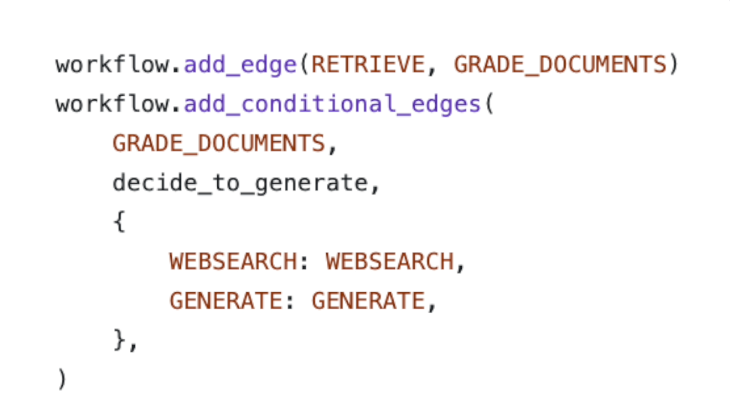

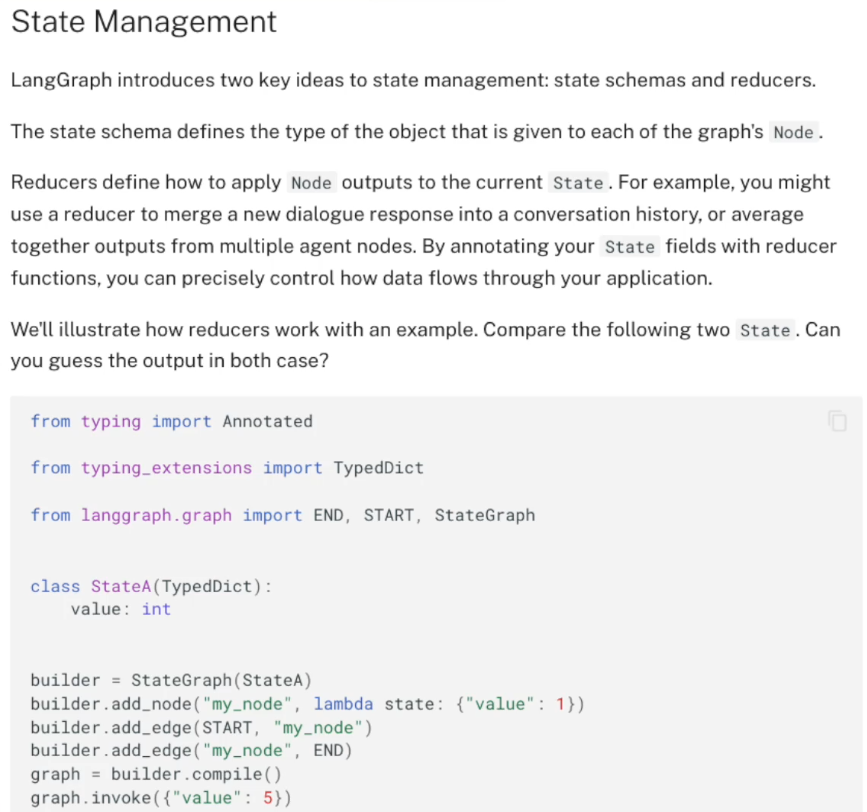

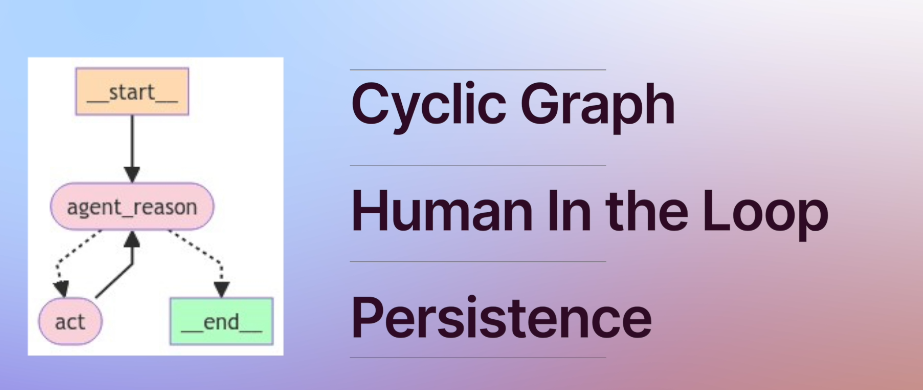

In [ ]:
!pip install -U langgraph

In [ ]:
def mock_llm():
    return {"messages": [{"role": "ai", "content": "hello world"}]}

mock_llm()

In [ ]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")
    #from langchain.chat_models import ChatOpenAI
    
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4.1",
    # stream_usage=True,
    temperature=0.0,
    max_tokens=1000,
    # timeout=None,
    #reasoning_effort="low",
    # max_retries=2,
    # api_key="...",  # if you prefer to pass api key in directly instead of using env vars
    # base_url="...",
    # organization="...",
    # other params...
)

In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END

def call_openai_llm(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    # Return the response formatted as a dictionary to update the state
    return {"messages": [response]} 

In [ ]:
from langgraph.graph import StateGraph, MessagesState, START, END

#def mock_llm(state: MessagesState):
    #return {"messages": [{"role": "ai", "content": "hello world"}]}



graph = StateGraph(MessagesState)
graph.add_node(call_openai_llm, name="call_openai_llm")
graph.add_edge(START, "call_openai_llm")
graph.add_edge("call_openai_llm", END)
graph = graph.compile()

#graph.invoke({"messages": [{"role": "user", "content": "hi!"}]})
graph.invoke({"messages": [{"role": "user", "content": "hi! Explain langgraph."}]})


In [ ]:
image_data = graph.get_graph().draw_mermaid_png()

with open("graph.png", mode="wb") as f:
    f.write(image_data)